In [1]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
import re
warnings.filterwarnings("ignore")

#format display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#date time
from datetime import datetime

In [2]:
cc_fraud = pd.read_excel('data/sprint_dataset.xlsx')

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 
    20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Data Cleaning and Preprocessing </span></div>

In [3]:
cc_fraud.shape

(200000, 25)

In [4]:
cc_fraud.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,b7e590b6def607cf89d91a9909985b82,2021-02-13,22:39:49,1613255989,misc_net,825.04,1,MedStoreRx,9.265518,123.368859
1,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,d248c10143858b069bb776065646ac48,2021-02-12,23:01:09,1613170869,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292
2,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,a4fb2e02583977d4afc46b09506611f8,2021-02-12,14:45:57,1613141157,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767
3,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,f315ea3abc262b459360f62bd3619c12,2021-02-12,23:08:59,1613171339,shopping_net,919.50,1,Zalora,10.606020,123.930862
4,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,ac3503258c2fff1c16a381d3633b1e0d,2021-02-13,22:56:43,1613257003,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528


In [5]:
cc_fraud['ssn'].value_counts()

4177-6865207-1    2125
8563-6400345-3    2124
5136-0385406-7    2123
7948-2503280-6    2123
6992-9962634-9    2123
2803-3526765-1    2123
3407-5607978-2    2122
6677-1595220-6    2122
3343-1596106-0    2121
1003-1956716-9    2121
7660-9470727-2    2121
9653-0489946-0    2121
6352-6352092-4    2121
9609-0341660-1    2120
7740-5699420-7    2120
4138-0418302-2    2119
3209-5985691-9    2118
7953-7517615-7    2118
2838-1779337-4    2118
4196-0746557-6    2118
7697-9316463-2    2118
8503-2794685-9    2118
4713-4466094-1    2118
8650-2186519-7    2117
7380-5454870-9    2117
6159-4935438-7    2117
4148-6424816-8    2117
4100-8308868-4    2117
0582-6288811-2    2117
1136-8630056-3    2117
7129-3118196-1    2116
3391-8749073-6    2116
3493-3177016-5    2116
0721-7502166-2    2116
9005-9965055-4    2116
2652-6828797-7    2115
2307-1515554-0    2115
5461-2129381-7    2115
9178-5911626-3    2114
6245-7458633-9    2114
8623-3744575-3    2113
2486-5571774-7    2113
3923-1428585-1    2110
2314-173859

In [6]:
cc_fraud.describe()

,cc_num,zip,lat,long,city_pop,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long
count,2.000000e+05,2.000000e+05,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.964612e+17,4.104403e+05,12.836680,122.156171,4.922793e+05,5.537723e+11,1.609189e+09,70.205819,0.008975,12.837277,122.154777
std,1.096331e+18,5.427869e+05,3.009466,1.785025,1.452450e+06,2.873295e+11,1.721540e+07,171.601519,0.094311,3.064447,1.875286
min,6.049060e+10,4.104100e+04,6.116700,118.750000,4.104100e+04,3.843261e+09,1.577837e+09,1.000000,0.000000,5.119448,117.755352
25%,1.800006e+14,1.307590e+05,10.250000,120.941700,1.338930e+05,3.187416e+11,1.594471e+09,8.700000,0.000000,10.213936,120.701837
50%,2.441121e+15,2.494630e+05,14.329400,121.125000,2.831570e+05,5.546115e+11,1.608365e+09,48.820000,0.000000,13.953511,121.535780
75%,4.525827e+15,4.116340e+05,14.683300,123.433300,4.116340e+05,8.450915e+11,1.624455e+09,85.410000,0.000000,15.026644,123.579867
max,4.957609e+18,2.936116e+06,18.200000,126.233300,2.308800e+07,9.973865e+11,1.638835e+09,18039.810000,1.000000,19.199625,127.232784


array([[<AxesSubplot:title={'center':'cc_num'}>,
        <AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'dob'}>,
        <AxesSubplot:title={'center':'acct_num'}>,
        <AxesSubplot:title={'center':'trans_date'}>],
       [<AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'amt'}>,
        <AxesSubplot:title={'center':'is_fraud'}>,
        <AxesSubplot:title={'center':'merch_lat'}>],
       [<AxesSubplot:title={'center':'merch_long'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

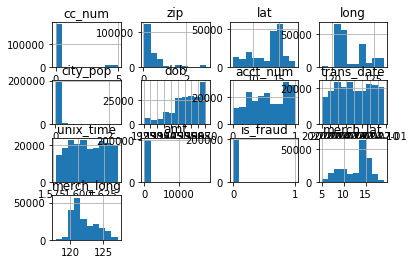

In [7]:
cc_fraud.hist()

### 1. Drop Unnecessary Variables -- output: cc_clean

In [8]:
to_drop = ['cc_num', 'first', 'last', 'street', 'state', 'zip', 'acct_num', 'trans_num', 'unix_time']
cc_clean = cc_fraud.drop(to_drop, axis=1)
cc_clean.head()

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,825.04,1,MedStoreRx,9.265518,123.368859
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,919.50,1,Zalora,10.606020,123.930862
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528


### 2. Encode Relevant Variables -- output: cc_clean

In [9]:
# pre-processing time
# transaction date
cc_clean['trans_datetime'] = pd.to_datetime(cc_clean['trans_date'])
cc_clean['trans_date'] = cc_clean['trans_datetime'].dt.date
cc_clean['trans_year'] = cc_clean['trans_datetime'].dt.year.astype(str)
cc_clean['trans_month'] = cc_clean['trans_datetime'].dt.month
cc_clean['trans_day'] = cc_clean['trans_datetime'].dt.day
cc_clean['trans_wday'] = pd.Series(cc_clean['trans_datetime']).dt.day_name()

# transaction time
cc_clean['trans_hour'] = cc_clean['trans_time'].astype(str).str[:2].astype(int)

# convert month to string
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
cc_clean['trans_month_'] = cc_clean['trans_month'].map(month_map)

# convert time to part of day
def get_part_of_day(hour):
    """Return the part of day given the hour of day"""
    if (hour > 22) or (hour <= 1):
        return 'late evening'
    elif hour <= 6:
        return 'early morning'
    elif hour <= 11:
        return 'late morning'
    elif hour <= 14:
        return 'midday'
    elif hour <= 18:
        return 'afternoon'
    else:
        return 'early evening'

#apply to dataframe
cc_clean.loc[:, 'part_of_day'] = cc_clean['trans_hour'].apply(get_part_of_day)

# convert transaction type
def get_trans_type(trans):
    if (trans == 'misc_net') or (trans == 'shopping_net') or (trans == 'grocery_net'):
        return 'net'
    else:
        return 'others'

#apply to dataframe    
cc_clean.loc[:, 'trans_type'] = cc_clean['category'].apply(get_trans_type)

#pre-processing age group
cc_clean['dob_datetime'] = pd.to_datetime(cc_clean['dob'])
cc_clean['dob'] = cc_clean['dob_datetime'].dt.date
cc_clean['age'] = (cc_clean['trans_date'] - cc_clean['dob'])/365
cc_clean['age'] = cc_clean['age'].apply(lambda x: x.days)
cc_clean['birth_year'] = cc_clean['dob'].astype(str).str[:4].astype(int)

# convert age group
def get_age_group(year):
    if year < 1946:
        return 'traditionalists'
    elif year < 1965:
        return 'baby boomers'
    elif year < 1977:
        return 'gen x'
    elif year < 1996:
        return 'milennials'
    else:
        return 'gen z'

#apply to dataframe
cc_clean.loc[:, 'age_group'] = cc_clean['birth_year'].apply(get_age_group)

#pre-processing double digit sales
cc_clean['dd_sale_prep'] = cc_clean['trans_month'] - cc_clean['trans_day']

# convert to sale_type
def get_sale_type(date):
    if date == 0:
        return 'double-digit sale'
    else:
        return 'others'

#apply to dataframe
cc_clean.loc[:, 'dd_sale'] = cc_clean['dd_sale_prep'].apply(get_sale_type)

cc_clean.tail(50)

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day,trans_type,dob_datetime,age,birth_year,age_group,dd_sale_prep,dd_sale
199950,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-08-29,01:56:50,entertainment,21.91,0,Philippine Educational Theater Association,10.218832,123.216024,2021-08-29,2021,8,29,Sunday,1,Aug,late evening,others,1959-12-19,61,1959,baby boomers,-21,others
199951,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-02,08:33:22,grocery_pos,74.02,0,All Day Supermarket,9.097269,124.739193,2020-05-02,2020,5,2,Saturday,8,May,late morning,others,1959-12-19,60,1959,baby boomers,3,others
199952,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-11-22,14:34:57,home,101.81,0,Tupperware Brands Philippines,9.868057,123.028731,2020-11-22,2020,11,22,Sunday,14,Nov,midday,others,1959-12-19,60,1959,baby boomers,-11,others
199953,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-02,01:16:59,grocery_pos,121.29,0,Rustans Supermarket,9.777285,124.793728,2020-05-02,2020,5,2,Saturday,1,May,late evening,others,1959-12-19,60,1959,baby boomers,3,others
199954,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-06-27,17:31:48,home,9.82,0,Uratex Philippines,9.257886,124.346790,2021-06-27,2021,6,27,Sunday,17,Jun,afternoon,others,1959-12-19,61,1959,baby boomers,-21,others
199955,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-03-13,07:12:55,food_dining,30.08,0,The Table Group,9.393347,123.786903,2020-03-13,2020,3,13,Friday,7,Mar,late morning,others,1959-12-19,60,1959,baby boomers,-10,others
199956,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-10,02:21:41,gas_transport,71.15,0,Liquigaz Philippines Corp.,10.407646,124.040790,2020-05-10,2020,5,10,Sunday,2,May,early morning,others,1959-12-19,60,1959,baby boomers,-5,others
199957,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-29,16:44:24,kids_pets,113.63,0,PetExpress,10.278662,124.817611,2020-05-29,2020,5,29,Friday,16,May,afternoon,others,1959-12-19,60,1959,baby boomers,-24,others
199958,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-08-26,14:40:10,personal_care,12.53,0,Unilever Philippines Inc.,9.584604,122.935865,2021-08-26,2021,8,26,Thursday,14,Aug,midday,others,1959-12-19,61,1959,baby boomers,-18,others
199959,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-04-28,14:12:23,health_fitness,18.46,0,The Upper Deck Gym,8.968703,123.034831,2021-04-28,2021,4,28,Wednesday,14,Apr,midday,others,1959-12-19,61,1959,baby boomers,-24,others


### 3. Retain final columns for one-hot enconding dataframe -- output: cc_final

In [10]:
# create a clean copy
cc_final = cc_clean.copy()

#select variables to drop
to_drop2 = ['ssn', 'gender', 'lat', 'long', 'merchant', 'dob', 'trans_date', 'trans_time', 
            'merch_lat', 'merch_long', 'trans_datetime', 'trans_month',
            'trans_hour', 'dob_datetime', 'birth_year', 'dd_sale_prep']

#drop selected variables
cc_final = cc_final.drop(to_drop2, axis=1)

#check dataset's columns
cc_final.head()

,city,city_pop,job,category,amt,is_fraud,trans_year,trans_day,trans_wday,trans_month_,part_of_day,trans_type,age,age_group,dd_sale
0,Tagbilaran City,105051,Planning and development surveyor,misc_net,825.04,1,2021,13,Saturday,Feb,early evening,net,60,baby boomers,others
1,Tagbilaran City,105051,Planning and development surveyor,grocery_pos,306.55,1,2021,12,Friday,Feb,late evening,others,60,baby boomers,others
2,Tagbilaran City,105051,Planning and development surveyor,entertainment,346.48,1,2021,12,Friday,Feb,midday,others,60,baby boomers,others
3,Tagbilaran City,105051,Planning and development surveyor,shopping_net,919.50,1,2021,12,Friday,Feb,late evening,net,60,baby boomers,others
4,Tagbilaran City,105051,Planning and development surveyor,shopping_net,1131.45,1,2021,13,Saturday,Feb,early evening,net,60,baby boomers,others


### 4. Filter Data According to Study Objective (online transactions only) --output: net_df

In [11]:
net_df = cc_final.copy()
net_df = net_df[net_df['trans_type']=='net']
net_df = net_df.drop('trans_type', axis=1)
net_df.head()

,city,city_pop,job,category,amt,is_fraud,trans_year,trans_day,trans_wday,trans_month_,part_of_day,age,age_group,dd_sale
0,Tagbilaran City,105051,Planning and development surveyor,misc_net,825.04,1,2021,13,Saturday,Feb,early evening,60,baby boomers,others
3,Tagbilaran City,105051,Planning and development surveyor,shopping_net,919.50,1,2021,12,Friday,Feb,late evening,60,baby boomers,others
4,Tagbilaran City,105051,Planning and development surveyor,shopping_net,1131.45,1,2021,13,Saturday,Feb,early evening,60,baby boomers,others
5,Tagbilaran City,105051,Planning and development surveyor,misc_net,996.26,1,2021,13,Saturday,Feb,early evening,60,baby boomers,others
6,Tagbilaran City,105051,Planning and development surveyor,shopping_net,923.63,1,2021,13,Saturday,Feb,late evening,60,baby boomers,others


In [12]:
#check sprint_df shape
net_df.shape

(20416, 14)

### 5. One-hot encode categorical variables --output: df_final

In [13]:
df_final = net_df.copy()

to_drop3 = []
for col in tqdm(df_final.columns):
    if df_final[col].dtype == 'O':
        dummies = pd.get_dummies(df_final[col], prefix=col, drop_first=False)
        df_final = pd.concat([df_final, dummies], axis=1)
        to_drop3.append(col)
df_final = df_final.drop(to_drop3, axis=1)
df_final.head()

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 253.84it/s]


,city_pop,amt,is_fraud,trans_day,age,city_Angeles City,city_Antipolo,city_Bacolod,city_Bacoor,city_Baguio City,city_Balanga,city_Batangas,city_Binan,city_Borongan,city_Butuan,city_Cabanatuan City,city_Cabuyao,city_Cadiz,city_Calapan,city_Caloocan City,city_Cebu City,city_City of Calamba,city_City of Isabela,city_City of Paranaque,city_Cotabato,city_Dagupan City,city_Dasmarinas,city_Davao,city_Digos,city_Dipolog,city_Dumaguete City,city_General Santos,city_General Trias,city_Ilagan,city_Iligan,city_Iloilo,city_Imus,city_Laoag,city_Legazpi City,city_Lipa City,city_Lucena,city_Maasin,city_Makati City,city_Malabon,city_Malaybalay,city_Mandaluyong City,city_Mandaue City,city_Manila,city_Marikina City,city_Masbate,city_Mati,city_Meycauayan,city_Muntinlupa City,city_Naga City,city_Navotas,city_Olongapo,city_Ormoc,city_Oroquieta,city_Pagadian,city_Palayan City,city_Pasay City,city_Pasig City,city_Puerto Princesa,city_Quezon City,city_San Fernando,city_San Jose del Monte,city_San Juan,city_San Pablo,city_San Pedro,city_Santa Rosa,city_Santiago,city_Sorsogon,city_Surigao,city_Tacloban,city_Tagbilaran City,city_Taguig City,city_Tagum,city_Talisay,city_Tandag,city_Tarlac City,city_Tuguegarao,city_Valenzuela,city_Vigan,city_Zamboanga City,"job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,"job_Administrator, charities/voluntary organisations","job_Administrator, education",job_Adult nurse,job_Advice worker,job_Aid worker,job_Air cabin crew,job_Air traffic controller,job_Ambulance person,job_Amenity horticulturist,job_Arboriculturist,job_Archivist,job_Art therapist,job_Biomedical scientist,job_Brewing technologist,job_Broadcast journalist,job_Building surveyor,job_Call centre manager,job_Camera operator,job_Ceramics designer,job_Chartered loss adjuster,job_Chemical engineer,"job_Chemist, analytical",job_Chiropractor,job_Claims inspector/assessor,"job_Clinical scientist, histocompatibility and immunogenetics",job_Colour technologist,job_Commissioning editor,job_Community development worker,job_Company secretary,job_Contracting civil engineer,job_Contractor,"job_Copywriter, advertising",job_Customer service manager,job_Cytogeneticist,job_Dance movement psychotherapist,job_Data processing manager,job_Data scientist,job_Database administrator,"job_Designer, exhibition/display","job_Designer, fashion/clothing","job_Designer, furniture","job_Development worker, community",job_Diplomatic Services operational officer,job_Drilling engineer,"job_Education officer, community","job_Education officer, museum",job_Emergency planning/management officer,"job_Engineer, electronics","job_Engineer, mining","job_Engineer, site","job_Engineer, water",job_Engineering geologist,job_English as a foreign language teacher,job_Environmental health practitioner,job_Equality and diversity officer,job_Exercise physiologist,job_Fashion designer,job_Financial controller,job_Financial manager,job_Freight forwarder,job_General practice doctor,job_Geographical information systems officer,"job_Geologist, engineering","job_Geologist, wellsite",job_Graphic designer,job_Higher education lecturer,job_Hotel manager,job_IT sales professional,job_Illustrator,job_Industrial/product designer,job_Insurance account manager,job_Insurance broker,job_Insurance claims handler,job_International aid/development worker,job_Interpreter,job_Land,job_Land/geomatics surveyor,job_Learning mentor,job_Lexicographer,"job_Librarian, academic","job_Librarian, public",job_Logistics and distribution manager,"job_Loss adjuster, chartered",job_Magazine features editor,job_Management consultant,job_Manufacturing systems engineer,job_Market researcher,job_Medical physicist,job_Medical technical officer,job_Mental health nurse,job_Meteorologist,job_Museum/gallery exhibitions officer,job_Nutritional therapist,job_Office manager,job_Oncologist,job_Operational investment banker,job_Operations geologist,job_Osteopath,job_Outdoor activities/education manager,j

In [14]:
df_final.shape

(20416, 285)

In [15]:
# #export to file
# df_final.to_csv('data/cc_df.csv', index=None)